In [35]:
# Show plots inline, and load main getdist plot module and samples class
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
# matplotlib 2 may not work very well without usetex on, can uncomment
# plt.rcParams['text.usetex']=True

GetDist Version: 1.3.3, Matplotlib version: 3.4.3


In [2]:
# Loading Planck 2018 data from http://pla.esac.esa.int/pla/#cosmology, CMB angular power spectra
#Full TT:
ells_planck, c_ells_tt_planck, delta_minus_tt, delta_plus_tt = np.genfromtxt('/gpfs/home/kuzhong/work/cocoa_AS2/Cocoa/projects/AStress/notebook/plots/COM_PowerSpect_CMB-TT-full_R3.01.txt', unpack=True)
#Binned TT
#ells_planck, c_ells_tt_planck, delta_minus_tt, delta_plus_tt, bestfit_tt = np.genfromtxt('/gpfs/home/kuzhong/work/cocoa_AS2/Cocoa/projects/AStress/notebook/plots/COM_PowerSpect_CMB-TT-binned_R3.01.txt', unpack=True)


# ells_planck_ee, c_ells_ee_planck, delta_minus_ee, delta_plus_ee, bestfit_planck = np.genfromtxt('/gpfs/home/kuzhong/work/cocoa_AS2/Cocoa/projects/AStress/notebook/plots/COM_PowerSpect_CMB-EE-binned_R3.02.txt', unpack=True)
# ells_planck_te, c_ells_te_planck, delta_minus_te, delta_plus_te, bestfit_planck = np.genfromtxt('/gpfs/home/kuzhong/work/cocoa_AS2/Cocoa/projects/AStress/notebook/plots/COM_PowerSpect_CMB-TE-binned_R3.02.txt', unpack=True)


In [37]:
root_name = '/gpfs/home/kuzhong/work/cocoa_AS2/Cocoa/projects/AStress/Cl_band/out_Cl'

with open(root_name+'.paramnames', 'w') as outfile:
    with open(root_name+'.txt') as infile:
        for i, line in enumerate(infile):
            if i==0 and line.startswith('#'):
                params_names_str = line.split()
                for j in params_names_str:
                    if str(j) != '#' and str(j) != 'weight' and str(j) != 'minuslogpost':
                        outfile.write(str(j))
                        outfile.write('\n')

In [38]:
samples = getdist.mcsamples.loadMCSamples(root_name)
lcdm_samples = getdist.mcsamples.loadMCSamples('/gpfs/home/kuzhong/work/cocoa_AS2/Cocoa/projects/AStress/Cl_band/lcdm_out_tt')

/gpfs/home/kuzhong/work/cocoa_AS2/Cocoa/projects/AStress/Cl_band/out_Cl.txt
Removed no burn in


In [50]:
ell = np.arange(3,150)


Cl_std = np.array([samples.std(i) for i in range(len(Cl_means))])

Cl_means_lcdm = lcdm_samples.getMeans()

Cl_range = np.arange(3,150)

Cl_means   = np.empty(0)
Cl_upper_1 = np.empty(0)
Cl_lower_1 = np.empty(0)
Cl_upper_2 = np.empty(0)
Cl_lower_2 = np.empty(0)


stats = samples.getMargeStats()
for ll in Cl_range:
    lims = stats.parWithName('Cl_'+str(ll)).limits
    means = stats.parWithName('Cl_'+str(ll)).mean
    
    Cl_means   = np.append(Cl_means, np.array(means))
    Cl_upper_1 = np.append(Cl_upper_1, np.array(means))
    Cl_lower_1 = np.append(Cl_lower_1, np.array(lims[0].lower))
    Cl_upper_2 = np.append(Cl_upper_2, np.array(lims[1].upper))
    Cl_lower_2 = np.append(Cl_lower_2, np.array(lims[1].lower))
    

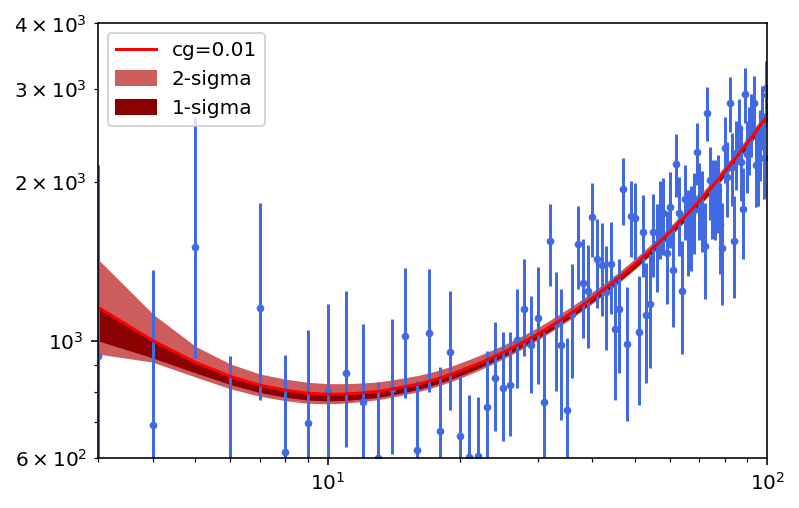

In [51]:
plt.loglog(ell, Cl_means,  color = 'red', linestyle = 'solid', label = 'cg=0.01')
#plt.loglog(ell, Cl_upper_1,  color = 'red', linestyle = 'solid')
#plt.loglog(ell, Cl_lower_1,  color = 'red', linestyle = 'solid')
#plt.loglog(ell, Cl_upper_2,  color = 'red', linestyle = 'solid')
#plt.loglog(ell, Cl_lower_2,  color = 'red', linestyle = 'solid')

plt.fill_between(ell, Cl_upper_2, Cl_lower_2, color = 'indianred', label = '2-sigma')
plt.fill_between(ell, Cl_upper_1, Cl_lower_1, color = 'darkred', label = '1-sigma')
#plt.fill_between(ell, Cl_upper_2, Cl_lower_2, color = 'indianred')

#plt.loglog(ell, Cl_means_lcdm              , color = 'black', linestyle = 'solid', label = 'lcdm-mean')

plt.scatter(ells_planck, c_ells_tt_planck ,
               color='royalblue', s=8)

plt.errorbar(ells_planck, c_ells_tt_planck,
                yerr=[delta_minus_tt, delta_plus_tt],
                fmt='none', color='royalblue', ms=2)

plt.xlim([3, 100])
plt.ylim(600,4000)
plt.legend(loc="upper left")

In [47]:
stats.parWithName('Cl_4').mean

1000.0780798634134